In [1]:
import matplotlib as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, BatchNormalization, MaxPooling2D, Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import L1L2
dense_regularizer = L1L2(l2=0.0001)
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from Bilinear_Pooling import Bilinear_Pooling

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#reshape data to fit model
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)
print(train_images.shape)
print(test_images.shape)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

BATCH_SIZE = 128

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
def Model_1(x=None):
    # we initialize the model
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(64, (5, 5), input_shape=(28,28,1),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(64, (5, 5),   padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(64, (5, 5),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Conv Block 2
    model.add(Conv2D(128, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(128, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(128, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Conv Block 3
    model.add(Conv2D(256, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(256, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(256, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Conv Block 4
    model.add(Conv2D(512, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(512, (3, 3),  padding='valid', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Bilinear_Pooling())

    # FC layers
    model.add(Flatten())
    model.add(Dense(10, activation='softmax', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))

    return model

model = Model_1()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [4]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [5]:
import tensorflow.keras
callbacks_list = [
tensorflow.keras.callbacks.EarlyStopping(
monitor='val_accuracy', min_delta=0.0001, 
patience=20, verbose=1, mode='auto',
baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau(
monitor='val_accuracy',
factor=0.5,
patience=10,
verbose=1,
mode='auto'),
tensorflow.keras.callbacks.ModelCheckpoint(
filepath='./my_model.h5',
monitor='val_accuracy',
save_best_only=True,
)
]

In [6]:
history = model.fit(train_images, train_labels, epochs=200, batch_size=BATCH_SIZE, verbose=1,
                    validation_data=(test_images, test_labels),callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 68s 1ms/sample - loss: 1.1459 - accuracy: 0.7961 - val_loss: 1.3404 - val_accuracy: 0.7153
Epoch 2/200
60000/60000 [==============================] - 62s 1ms/sample - loss: 1.0453 - accuracy: 0.8298 - val_loss: 1.6740 - val_accuracy: 0.6123
Epoch 3/200
60000/60000 [==============================] - 62s 1ms/sample - loss: 1.5974 - accuracy: 0.7426 - val_loss: 2.4688 - val_accuracy: 0.5370
Epoch 4/200
60000/60000 [==============================] - 63s 1ms/sample - loss: 1.9503 - accuracy: 0.6966 - val_loss: 1.7408 - val_accuracy: 0.7171
Epoch 5/200
60000/60000 [==============================] - 62s 1ms/sample - loss: 1.7370 - accuracy: 0.7330 - val_loss: 1.7779 - val_accuracy: 0.7141
Epoch 6/200
60000/60000 [==============================] - 63s 1ms/sample - loss: 1.7215 - accuracy: 0.7340 - val_loss: 1.6657 - val_accuracy: 0.7268
Epoch 7/200
60000/60000 [=========================

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

test_acc: 0.8284
test_loss: 1.0175704878807068


In [8]:
from matplotlib import pyplot as plt

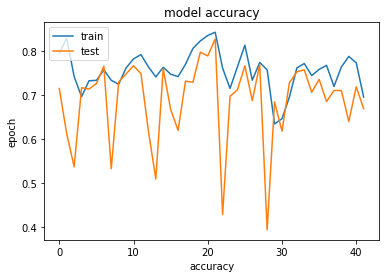

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

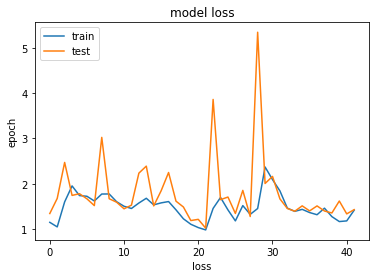

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

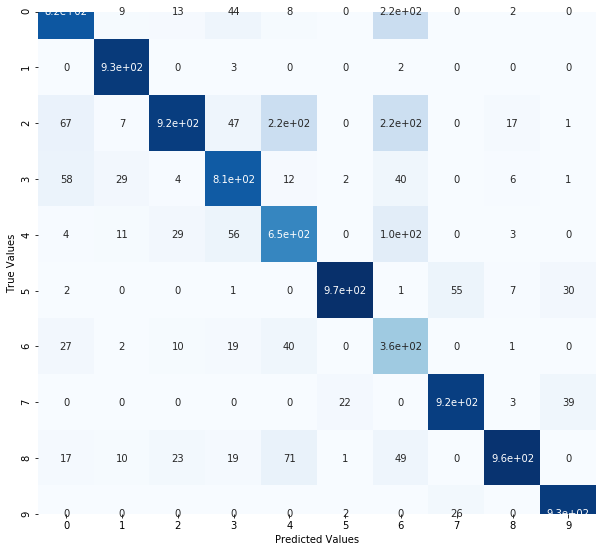

In [11]:
import numpy as np
import seaborn as sns

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();